### Testy statystyczne

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

In [4]:
df_prep = pd.read_csv("..//datasets/gasometry_prepared_data.csv")
cols=["BETET",	"CO2TET",	"HCO3ACTE",	"HCO3STTE",	"O2SATTET",	"O2TET", "IONH"]
my_blue="#0064B2"
my_red="#D61600"

In [6]:
normality_df = pd.DataFrame(index=cols, columns=['Statystyka_0.0', 'P-wartość_0.0', 'Statystyka_1.0', 'P-wartość_1.0'])

# Podział danych względem klasy zgon
grupy = df_prep.groupby('ZGON')

# Dla każdej zmiennej przeprowadzenie testu normalności Shapiro-Wilka dla obu grup
for column in df_prep[cols]:  # Iteracja po wszystkich kolumnach oprócz ostatniej (zgon)
    for group, data_group in grupy:
        stat, p = shapiro(data_group[column])
        normality_df.at[column, f'Statystyka_{group}'] = stat
        normality_df.at[column, f'P-wartość_{group}'] = p

print(normality_df)
normality_df.to_excel("normality.xlsx")

         Statystyka_0.0 P-wartość_0.0 Statystyka_1.0 P-wartość_1.0
BETET          0.993043      0.000001       0.996989      0.008445
CO2TET         0.975675           0.0       0.912258           0.0
HCO3ACTE       0.994996      0.000055       0.980795           0.0
HCO3STTE       0.989906           0.0       0.994907      0.000104
O2SATTET        0.57153           0.0       0.643173           0.0
O2TET          0.953999           0.0       0.924904           0.0
IONH           0.839791           0.0       0.838979           0.0


In [9]:
df_dead = df_prep[df_prep["ZGON"]==1].copy()
df_life = df_prep[df_prep["ZGON"]==0].copy()
tabela_MN=pd.DataFrame(columns=("Zmienna", "Statystyka U", "P-wartość_two","P-wartość_less", "P-wartość_greater"))
for column in cols:
    mw2 = mannwhitneyu(df_dead[column], df_life[column], alternative="two-sided")
    mw_less = mannwhitneyu(df_dead[column], df_life[column], alternative="less")
    mw_greater = mannwhitneyu(df_dead[column], df_life[column], alternative="greater")
    new_row = {"Zmienna": column, "Statystyka U": mw2[0], "P-wartość_two": mw2[1], "P-wartość_less": mw_less[1], "P-wartość_greater": mw_greater[1]}
    tabela_MN = pd.concat([tabela_MN, pd.DataFrame([new_row])], ignore_index=True)
# tabela_MN.to_excel("wyniki_MN.xlsx")
tabela_MN

C:\Users\dorot\AppData\Local\Temp\ipykernel_1296\2226963508.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabela_MN = pd.concat([tabela_MN, pd.DataFrame([new_row])], ignore_index=True)


,Zmienna,Statystyka U,P-wartość_two,P-wartość_less,P-wartość_greater
0,BETET,835710.5,2.391147e-25,1.195573e-25,1.000000e+00
1,CO2TET,1278940.0,4.167418e-19,1.000000e+00,2.083709e-19
2,HCO3ACTE,914801.5,3.573853e-12,1.786927e-12,1.000000e+00
3,HCO3STTE,816260.5,2.263204e-29,1.131602e-29,1.000000e+00
4,O2SATTET,773263.5,2.239619e-39,1.119810e-39,1.000000e+00
5,O2TET,893377.0,3.079703e-15,1.539851e-15,1.000000e+00
6,IONH,1451399.0,7.591629e-61,1.000000e+00,3.795815e-61


C:\Users\dorot\AppData\Local\Temp\ipykernel_1296\1333870300.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_line["ZGON"].replace({0: "nie", 1: "tak"}, inplace=True)
c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\dorot\AppDat

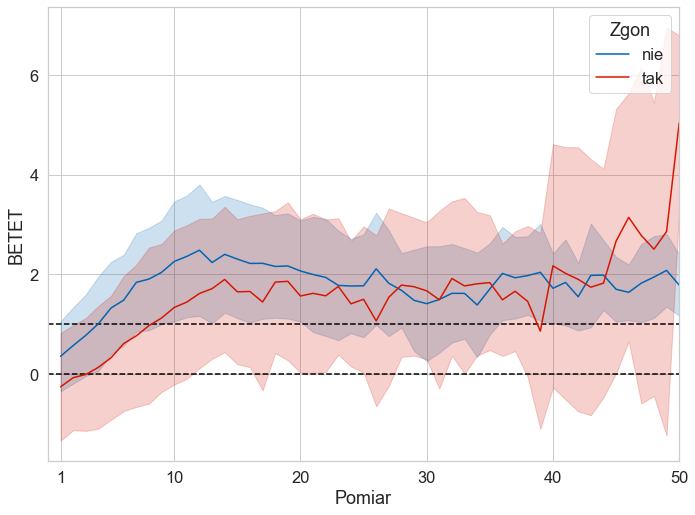

c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


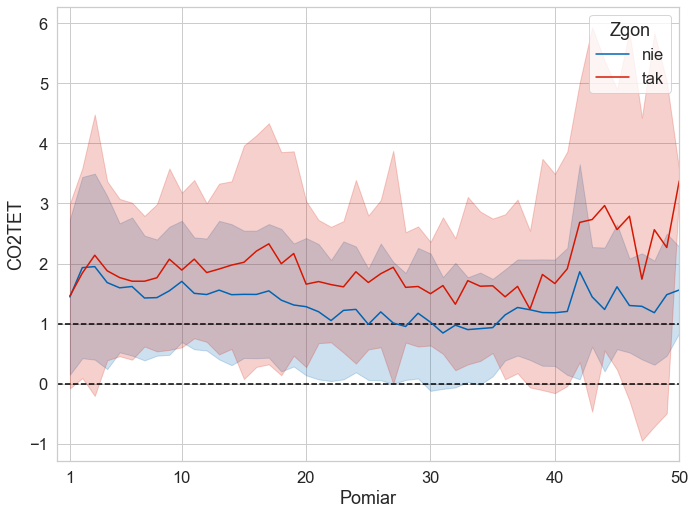

c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


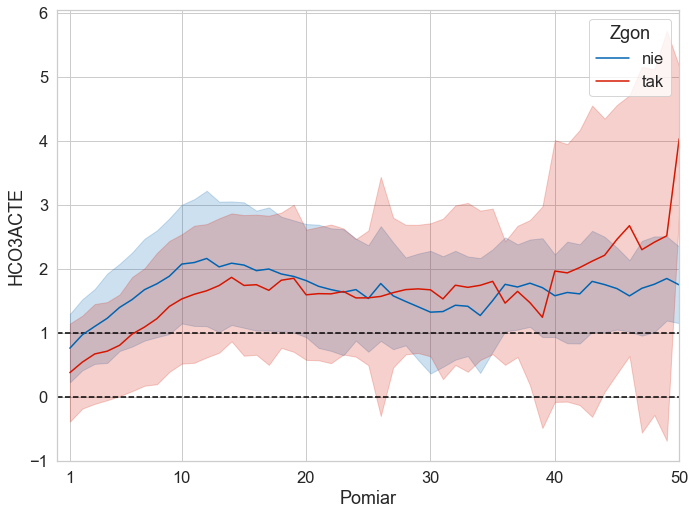

c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


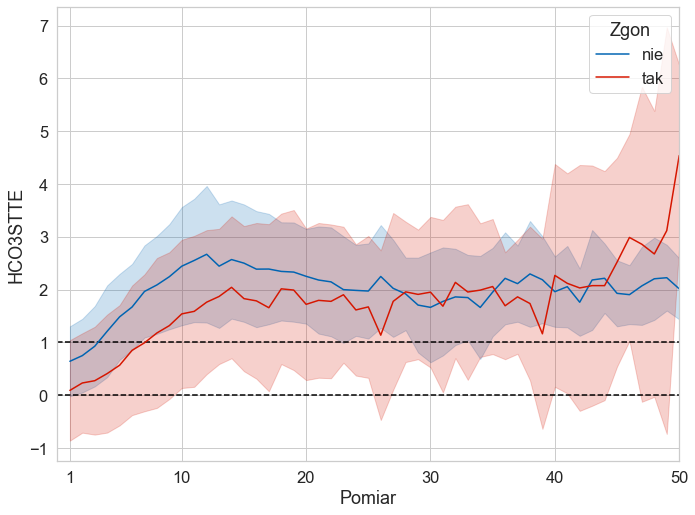

c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


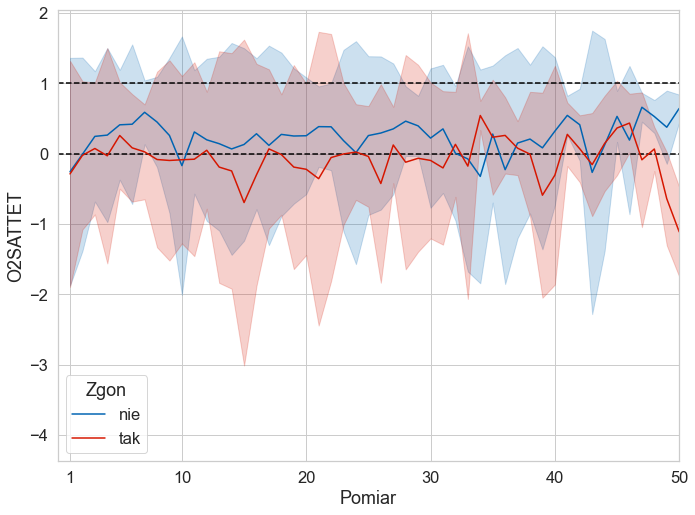

c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


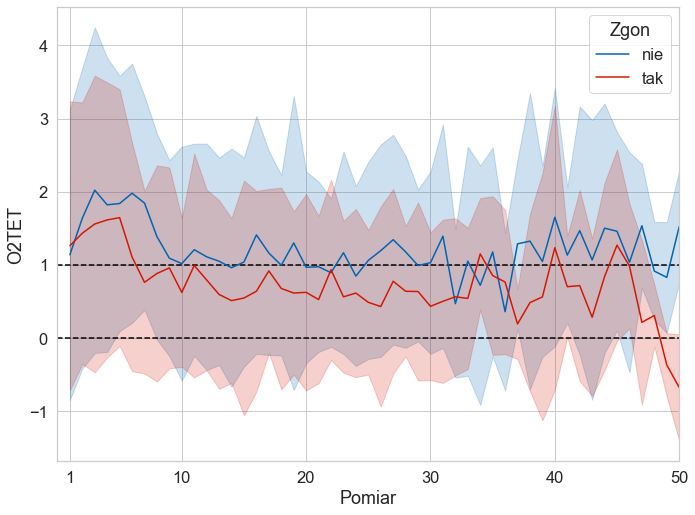

c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


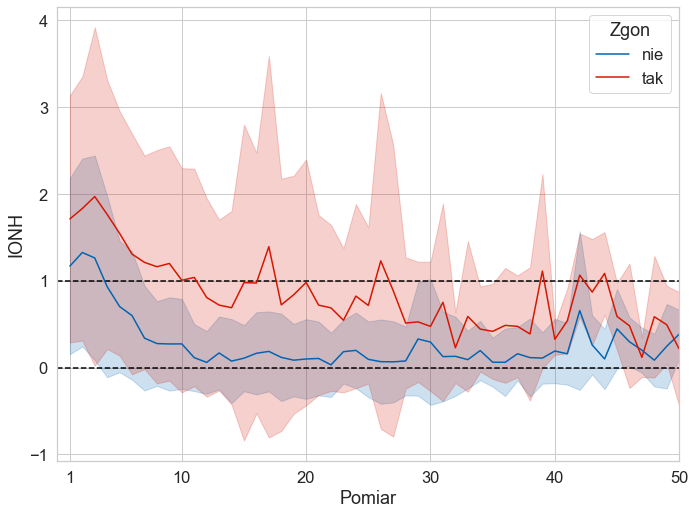

c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


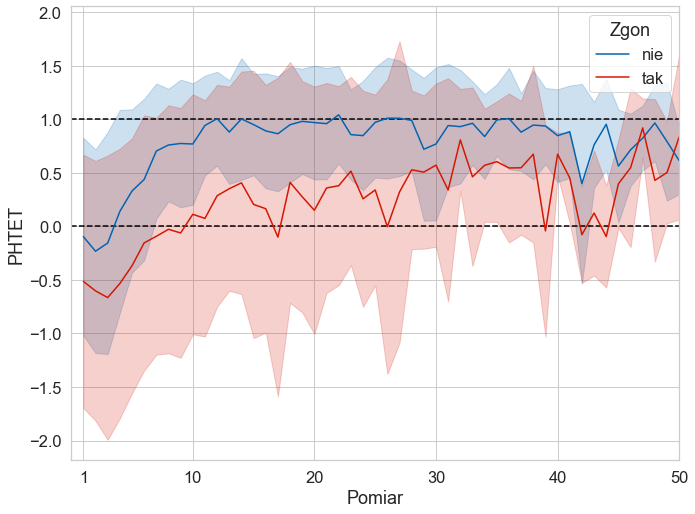

In [12]:
params=[*cols, "PHTET"]
df_line = df_prep[[*params, "ZGON", "BADANIE_NR"]].copy()
df_line["ZGON"].replace({0: "nie", 1: "tak"}, inplace=True)

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

# Rysowanie wykresów dla każdego parametru
for i, param in enumerate(params):
    # Tworzenie nowego obrazu dla każdego parametru
    plt.figure(figsize=(10, 7.5), facecolor='white')

    plt.axhline(y=0, linestyle='--', color="black")
    plt.axhline(y=1, linestyle='--', color="black")
    
    sns.lineplot(data=df_line, x="BADANIE_NR", y=param, hue="ZGON", ci='sd',
                 palette={'nie': my_blue, 'tak': my_red})

    plt.xlabel('Pomiar')
    plt.ylabel(f'{param}')
    plt.xlim(0, 50)
    plt.xticks(ticks=[1, 10, 20, 30, 40, 50])
    plt.legend(title="Zgon")
    plt.tight_layout()

    # Zapisywanie obrazu do pliku o nazwie "line_plot_param.png"
    plt.savefig(f'images3/plot_in_time_{i}.png')

    # Pokazywanie obrazu
    plt.show()